In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import time



In [2]:
# Reading the dataset
data = pd.read_csv("Boston (1).csv")



In [3]:
# Preprocessing the dataset
x = data.drop('MEDV', axis=1)
y = data['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



In [ ]:
# Model definition
model = Sequential()
model.add(Dense(128,input_shape=(13,), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()



In [5]:
# Training the model
start_time = time.time()
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
train_time = time.time() - start_time
print("Training time:", train_time)



C:\Users\Manpreet\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/50
11/11 [==============================] - 2s 29ms/step - loss: 569.3265 - mae: 22.0975 - val_loss: 517.3486 - val_mae: 20.7267
Epoch 2/50
11/11 [==============================] - 0s 6ms/step - loss: 515.5994 - mae: 20.8528 - val_loss: 455.6685 - val_mae: 19.2916
Epoch 3/50
11/11 [==============================] - 0s 6ms/step - loss: 439.0407 - mae: 19.0485 - val_loss: 371.5723 - val_mae: 17.2721
Epoch 4/50
11/11 [==============================] - 0s 6ms/step - loss: 339.1546 - mae: 16.4707 - val_loss: 264.5643 - val_mae: 14.3615
Epoch 5/50
11/11 [==============================] - 0s 6ms/step - loss: 221.8383 - mae: 12.7820 - val_loss: 154.4082 - val_mae: 10.7311
Epoch 6/50
11/11 [==============================] - 0s 7ms/step - loss: 123.2713 - mae: 8.8487 - val_loss: 85.0155 - val_mae: 7.4204
Epoch 7/50
11/11 [==============================] - 0s 6ms/step - loss: 72.5084 - mae: 6.4583 - val_loss: 62.4252 - val_mae: 5.7040
Epoch 8/50
11/11 [==============================] - 0s

In [6]:
# Evaluating the model
start_time = time.time()
mse, mae = model.evaluate(x_test, y_test)
test_time = time.time() - start_time
print("Testing time:", test_time)
print("MSE:", mse)
print("MAE:", mae)



4/4 [==============================] - 0s 0s/step - loss: 11.5838 - mae: 2.6928
Testing time: 0.10940933227539062
MSE: 11.583806037902832
MAE: 2.6927757263183594


In [7]:
y_pred = model.predict(x_test[:])

4/4 [==============================] - 0s 3ms/step


In [8]:
p=[]
for i in y_pred:
 p.append(list(i)[0])
d = pd.DataFrame({'actual':y_test,'predicted':p})
d

actual  predicted
307    28.2  27.748547
343    23.9  21.499449
47     16.6  18.713158
67     22.0  21.465132
362    20.8  24.018377
..      ...        ...
92     22.9  23.158258
224    44.8  43.922989
110    21.7  19.666040
426    10.2  16.942909
443    15.4  13.601565

[102 rows x 2 columns]

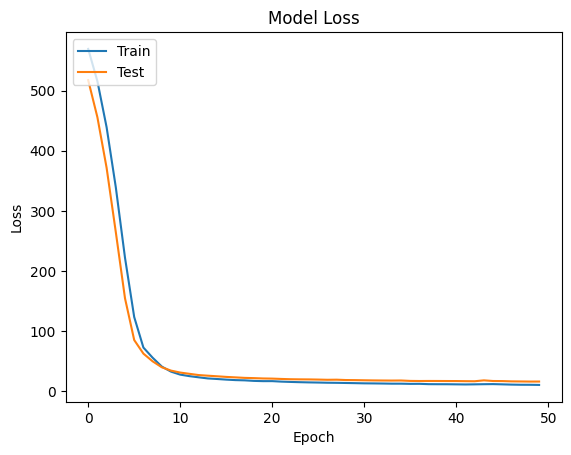

In [9]:
# Plotting the training history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
# Predicting using dynamic input from the user
while True:
    try:
        user_input = [float(x.strip()) for x in input("Enter the values of 13 features separated by commas: ").split(',')]
        if len(user_input) != 13:
            print("Please enter exactly 13 values.")
            continue
        user_input = np.array(user_input).reshape(1, 13)
        user_input_scaled = scaler.transform(user_input)  # Scale input features
        
        start_time = time.time()
        prediction = model.predict(user_input_scaled)
        pred_time = time.time() - start_time
        
        print("Predicted MEDV:", prediction[0][0])
        print("Prediction time:", pred_time)
    except ValueError:
        print("Please enter numerical values only.")
    except KeyboardInterrupt:
        print("\nExiting...")
        break
# 0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14

Enter the values of 13 features separated by commas: 1.6286399999999999,0.0,21.89,0,0.624,5.019,100.0,1.4394,4,437.0,21.2,396.9,34.41
1/1 [==============================] - 0s 47ms/step


C:\Users\Manpreet\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted MEDV: 15.224768
Prediction time: 0.10199570655822754
